# PART 1

# Necessary Imports

In [1]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline
pyplot.style.use('ggplot')

# Constants

In [2]:
CROSS_VALIDATION_SETS = 5
MAX_K = 10
RANDOM_STATE = 696969
LABEL_NAMES = ['English', 'Urdu', 'Mixed']

# Importing and Splitting Dataset

In [3]:
data = pd.read_csv('dataset.csv')

train = data.sample(frac = 0.8, random_state = RANDOM_STATE)
test = data.drop(train.index)

train = train.to_numpy()
test = test.to_numpy()

train_x = train[:, 1:-1]
train_y = train[:, -1]

test_x = test[:, 1:-1]
test_y = test[:, -1]

Scaling Data

In [4]:
scaler = StandardScaler()
scaler = scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [5]:
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,LABEL
0,0,14.443077,-8.036094,-4.077253,-0.274023,-9.003208,-17.048237,-21.399697,-16.263466,3.396780,-12.284809,0.908476,-10.026655,-4.254287,0
1,1,10.219182,1.742702,1.002258,-2.806073,-14.951893,-21.500796,-13.495337,-9.305933,-7.441661,-1.825364,-8.279968,0.422083,-3.959009,0
2,2,13.876193,1.004525,-10.143044,4.769317,-25.268881,-12.703184,-17.730170,-6.543746,-15.888943,-2.577060,-9.861565,1.551331,-3.312003,0
3,3,12.510054,-3.575093,-4.913943,-6.122454,-3.552648,-9.513949,-10.869105,-8.880711,1.368740,-5.230862,-0.560520,-4.260071,-8.647045,0
4,4,16.165702,7.492517,-18.944081,-11.769776,0.360446,-10.676715,-10.353008,7.848967,0.781196,-0.323822,-6.596552,-6.907072,-4.249575,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,17375,12.577980,0.449793,8.464243,13.715499,-1.113134,2.922420,-6.761397,2.240919,4.728756,-3.520493,6.343505,1.306161,-3.577430,1
17376,17376,10.832928,5.712939,6.460498,0.479978,-9.827152,-8.491606,-16.057971,-7.821987,-7.278880,-8.225414,-1.474205,-10.781243,-8.982661,1
17377,17377,15.653813,-6.198936,-0.756519,-0.182128,-5.058881,-12.113604,-15.959658,-1.984598,-3.341601,-5.365412,0.485510,-4.278507,-10.961661,1
17378,17378,14.656198,2.442599,-1.116128,-3.430590,-9.892589,-16.597521,-17.447496,-1.346676,-11.960978,-9.395277,-5.763173,-7.353033,-8.212849,1


In [6]:
print("train_x shape:", train_x.shape)
print("train_y shape:", train_y.shape)

train_x shape: (13904, 13)
train_y shape: (13904,)


In [7]:
print("test_x shape:", test_x.shape)
print("test_y shape:", test_y.shape)

test_x shape: (3476, 13)
test_y shape: (3476,)


# Finding Best Value of k

In [8]:
acc_list = list()
f1_list = list()

def knn_cross_validation(k, train_x, train_y, cv_sets):
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    preds = cross_val_predict(knn, train_x, train_y, cv=cv_sets)

    acc = accuracy_score(train_y, preds) * 100
    f1 = classification_report(train_y, preds, output_dict=True)["macro avg"]["f1-score"]

    return acc, f1


for i in range(1, MAX_K + 1):
    acc, f1 = knn_cross_validation(i, train_x, train_y, CROSS_VALIDATION_SETS)

    acc_list.append(acc)
    f1_list.append(f1)

    print(f"K = {i} Tested with 5-fold CV")

K = 1 Tested with 5-fold CV
K = 2 Tested with 5-fold CV
K = 3 Tested with 5-fold CV
K = 4 Tested with 5-fold CV
K = 5 Tested with 5-fold CV
K = 6 Tested with 5-fold CV
K = 7 Tested with 5-fold CV
K = 8 Tested with 5-fold CV
K = 9 Tested with 5-fold CV
K = 10 Tested with 5-fold CV


In [9]:
def plot_confusion_matrix(conf_mat, labels):
    classes = list(labels)
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    pyplot.figure(figsize=(10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
    pyplot.show()

def plot(x, y, xlabel, ylabel, title):
    pyplot.plot(x,y)
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.title(title)
    pyplot.xticks(x)
    pyplot.show()

x = [i for i in range(1, MAX_K + 1)]

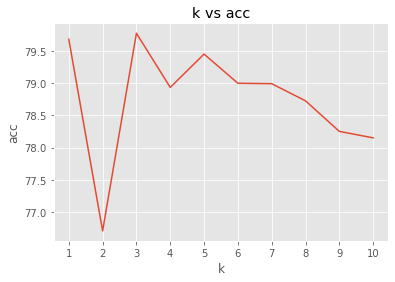

In [10]:
plot(x, acc_list, 'k', 'acc', 'k vs acc')

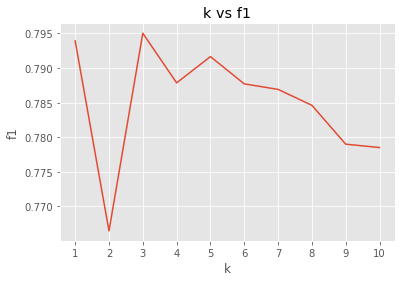

In [11]:
plot(x, f1_list, 'k', 'f1', 'k vs f1')

# Best value ---> k = 3

In [12]:
BEST_K = 3

# 5 Fold CV on K = 3

In [13]:
knn_cv = KNeighborsClassifier(n_neighbors=BEST_K)
knn_cv.fit(train_x, train_y)
cv_scores = cross_val_score(knn_cv, train_x, train_y, cv=CROSS_VALIDATION_SETS)

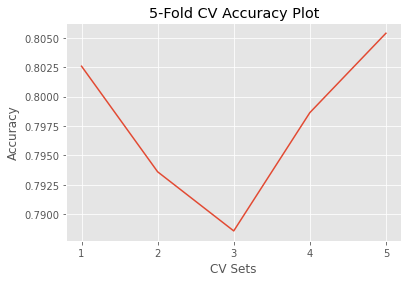

In [14]:
x = [x for x in range(1, CROSS_VALIDATION_SETS + 1)]

plot(x, cv_scores, 'CV Sets', 'Accuracy', '5-Fold CV Accuracy Plot')

# Running For Test Data

In [15]:
def test_knn(k, train_x, train_y, test_x, test_y):
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(train_x, train_y)
    preds = knn.predict(test_x)


    cfm = confusion_matrix(test_y, preds)
    stats = classification_report(test_y, preds, target_names=LABEL_NAMES)

    return stats, cfm 

Some Statistics

In [16]:
stats, cfm = test_knn(BEST_K, train_x, train_y, test_x, test_y)
print(stats)

              precision    recall  f1-score   support

     English       0.74      0.80      0.77      1033
        Urdu       0.83      0.78      0.81      1087
       Mixed       0.85      0.84      0.84      1356

    accuracy                           0.81      3476
   macro avg       0.81      0.81      0.81      3476
weighted avg       0.81      0.81      0.81      3476



Confusion Matrix

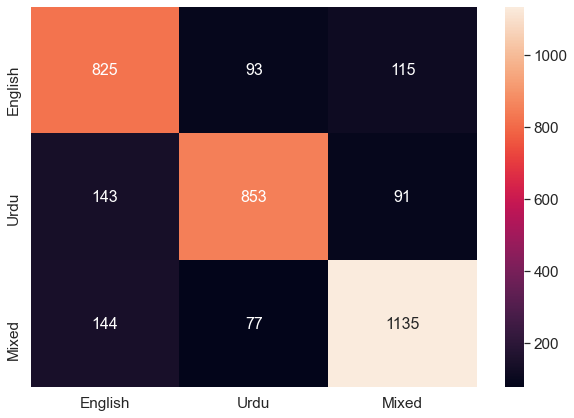

In [17]:
plot_confusion_matrix(cfm, LABEL_NAMES)

# PART 2

# Necessary Imports

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
import time
%matplotlib inline
plt.style.use('ggplot')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV

# Constants

In [19]:
CROSS_VALIDATION_SETS = 5
MAX_K = 10
RANDOM_STATE = 69
LABEL_NAMES = ['English', 'Urdu', 'Mixed']

# Loading Dataset and Splitting

In [20]:
data = pd.read_csv('dataset.csv')

train = data.sample(frac = 0.8, random_state = RANDOM_STATE)
test = data.drop(train.index)

train = train.to_numpy()
test = test.to_numpy()

train_x = train[:, 1:-1]
train_y = train[:, -1]

test_x = test[:, 1:-1]
test_y = test[:, -1]

scaler = StandardScaler()
scaler = scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [21]:
print("train_x shape:", train_x.shape)
print("train_y shape:", train_y.shape)

train_x shape: (13904, 13)
train_y shape: (13904,)


In [22]:
print("test_x shape:", test_x.shape)
print("test_y shape:", test_y.shape)

test_x shape: (3476, 13)
test_y shape: (3476,)


# Finding Best Parameters

Setting Parameters 

In [23]:
C = [1, 10, 100]
gamma = [0.01, 0.1, 1]
degree = [3, 4, 5]

param_grid = [
   {'kernel': ['rbf', 'sigmoid'], 'C': C, 'gamma': gamma},
   {'kernel': ['poly'], 'C': C, 'gamma': gamma, 'degree': degree},
]

Searching for the best ones

In [24]:
start = time.time()

model = HalvingGridSearchCV(
    SVC(), 
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=20,
    refit=True,
    verbose=3,
)
model.fit(train_x, train_y)

end = time.time()

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 514
max_resources_: 13904
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 45
n_resources: 514
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 1
n_candidates: 15
n_resources: 1542
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 2
n_candidates: 5
n_resources: 4626
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 3
n_candidates: 2
n_resources: 13878
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [25]:
time_taken = (end - start) / 60
print(f'Time Taken: {time_taken:.1f} Minutes')

Time Taken: 1.8 Minutes


Best Parameters

In [26]:
print("Best Validation Accuracy:", model.best_score_)
print("Best parameters:")
pprint.pprint(model.best_params_)

best_model = model.best_estimator_

Best Validation Accuracy: 0.811661879615737
Best parameters:
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


# 5 Fold CV on Best Parameters

In [27]:
clf = SVC(C=10, gamma=0.01, kernel='rbf')
clf.fit(train_x, train_y)

cv_scores = cross_val_score(clf, train_x, train_y, cv=CROSS_VALIDATION_SETS)

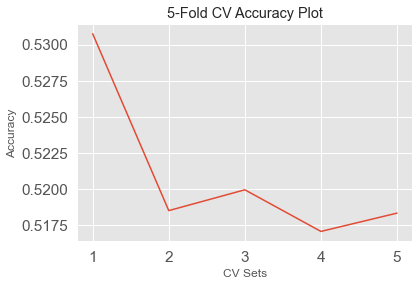

In [28]:
x = [x for x in range(1, CROSS_VALIDATION_SETS + 1)]

plot(x, cv_scores, 'CV Sets', 'Accuracy', '5-Fold CV Accuracy Plot')

# Running For Test Data

In [29]:
preds = best_model.predict(test_x)

Some Statistics

In [30]:
print(classification_report(test_y, preds, target_names=LABEL_NAMES))

              precision    recall  f1-score   support

     English       0.84      0.75      0.79      1072
        Urdu       0.86      0.75      0.80      1091
       Mixed       0.76      0.91      0.83      1313

    accuracy                           0.81      3476
   macro avg       0.82      0.80      0.81      3476
weighted avg       0.82      0.81      0.81      3476



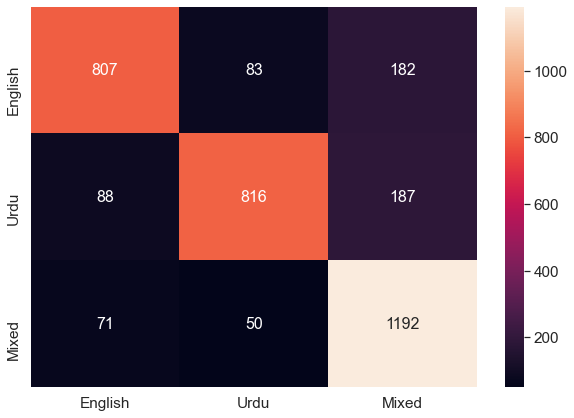

In [31]:
cfm = confusion_matrix(test_y, preds)
plot_confusion_matrix(cfm, LABEL_NAMES)

# PART 3

# Notebook Imports
 

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import pprint

%matplotlib inline

# Constants

In [33]:
DATASET_PATH = "dataset.csv"
RANDOM_STATE = 1
CROSS_VALIDATION_SETS = 5
LABEL_NAMES = ["English", "Urdu", "Mixed"]

# Importing and Splitting Data

In [34]:
data = pd.read_csv(DATASET_PATH)

In [35]:
# randomly shuffle dataframe

train = data.sample(frac=0.8, random_state=RANDOM_STATE)
test = data.drop(train.index)

print("Length of train dataset:", len(train))
print("Length of test dataset:", len(test))

Length of train dataset: 13904
Length of test dataset: 3476


In [36]:
x_train = np.array(train)[:, 1:-1]
y_train = np.array(train)[:, -1]

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (13904, 13)
y_train shape: (13904,)


In [37]:
x_test = np.array(test)[:, 1:-1]
y_test = np.array(test)[:, -1]

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_test shape: (3476, 13)
y_test shape: (3476,)


In [38]:
scaler = StandardScaler()
scaler = scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Training And Validation

In [39]:
# hyper parameters

LEARNING_RATE_INIT = 0.0001
ALPHA = 0.012
HIDDEN_LAYERS = (1024, 512, 512, 256, 32)

In [40]:
model = MLPClassifier(hidden_layer_sizes=(HIDDEN_LAYERS), alpha=ALPHA, learning_rate_init=LEARNING_RATE_INIT)
model.fit(x_train, y_train)

MLPClassifier(alpha=0.012, hidden_layer_sizes=(1024, 512, 512, 256, 32),
              learning_rate_init=0.0001)

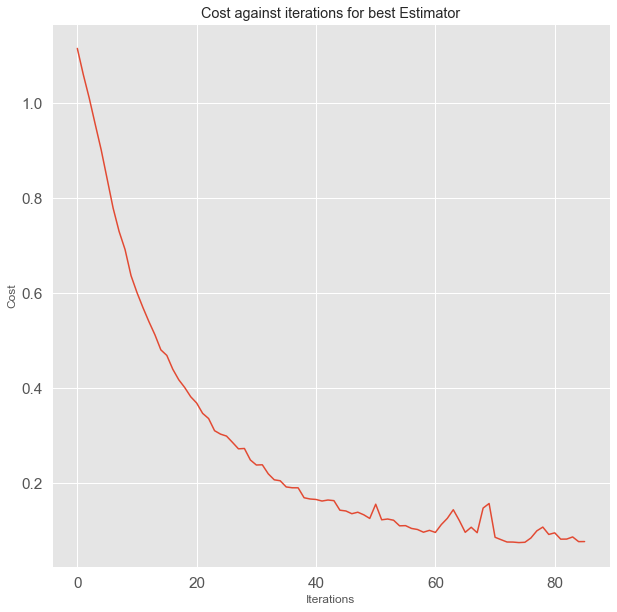

In [41]:
loss = model.loss_curve_

plt.style.use("ggplot")
plt.figure(figsize=(10, 10))
plt.plot(range(len(loss)), loss)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost against iterations for best Estimator")
plt.show()

# 5 Fold CV

In [42]:
nn = MLPClassifier(hidden_layer_sizes=(HIDDEN_LAYERS), alpha=ALPHA, learning_rate_init=LEARNING_RATE_INIT)
nn.fit(x_train, y_train)

MLPClassifier(alpha=0.012, hidden_layer_sizes=(1024, 512, 512, 256, 32),
              learning_rate_init=0.0001)

In [43]:
cv_scores = cross_val_score(nn, x_train, y_train, cv=CROSS_VALIDATION_SETS)

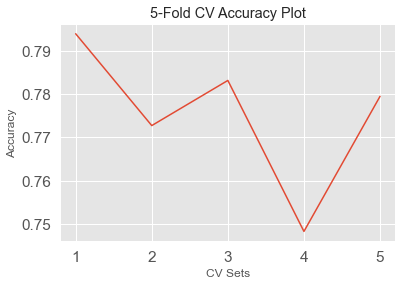

In [44]:
x = [x for x in range(1, CROSS_VALIDATION_SETS + 1)]

plot(x, cv_scores, 'CV Sets', 'Accuracy', '5-Fold CV Accuracy Plot')

# Testing and Evaluation

In [45]:
preds = model.predict(x_test)

In [46]:
print(classification_report(y_test, preds, target_names=LABEL_NAMES))

              precision    recall  f1-score   support

     English       0.74      0.79      0.77      1060
        Urdu       0.75      0.76      0.76      1020
       Mixed       0.85      0.79      0.82      1396

    accuracy                           0.79      3476
   macro avg       0.78      0.78      0.78      3476
weighted avg       0.79      0.79      0.79      3476



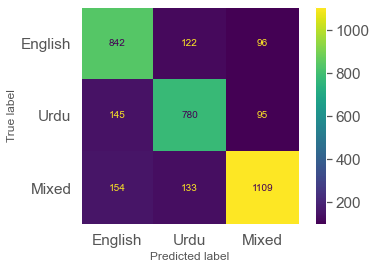

In [47]:
conf = confusion_matrix(y_test, preds)
matrix_plotter = ConfusionMatrixDisplay(conf, display_labels=LABEL_NAMES)

a = matrix_plotter.plot(ax=None)
a.ax_.grid()
plt.show()